In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
# extracting features from time
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')

In [18]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day']= i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour
    i['Day of week']=i.Datetime.dt.dayofweek

In [8]:
#chenking for weekend
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

In [9]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,Day of Week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


No handles with labels found to put in legend.


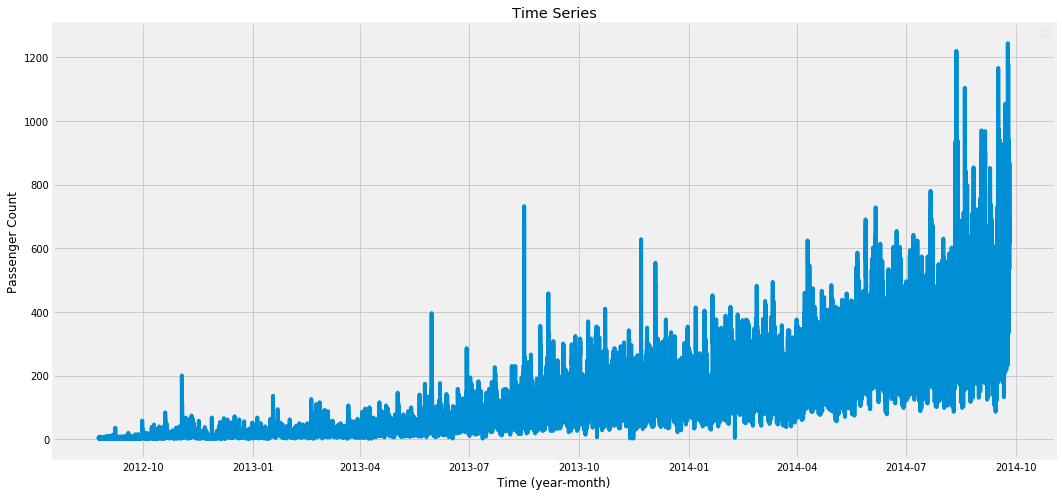

In [10]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc = 'best')

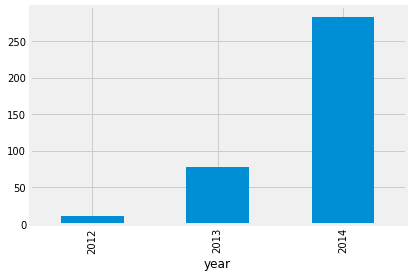

In [11]:
train.groupby('year')['Count'].mean().plot.bar()

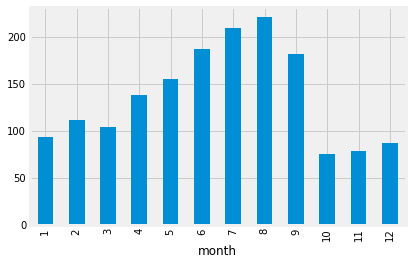

In [12]:
train.groupby('month')['Count'].mean().plot.bar()

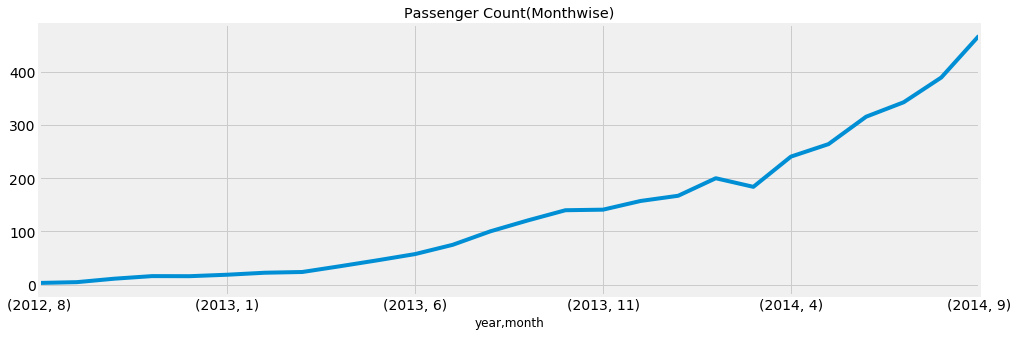

In [13]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize =(15,5), title = "Passenger Count(Monthwise)", fontsize = 14)

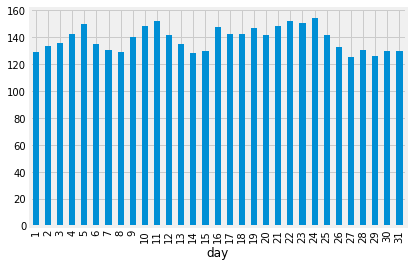

In [14]:
train.groupby('day') ['Count'].mean().plot.bar()

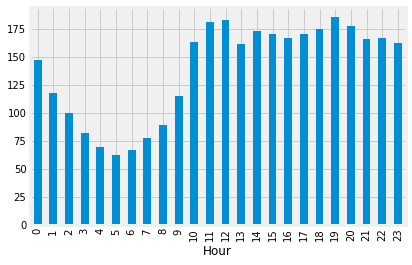

In [15]:
train.groupby('Hour')['Count'].mean().plot.bar()

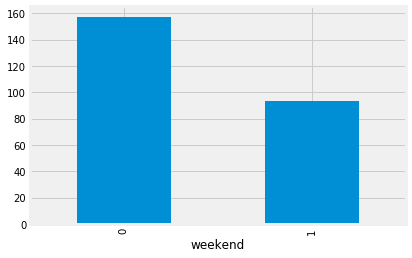

In [16]:
train.groupby('weekend') ['Count'].mean().plot.bar()

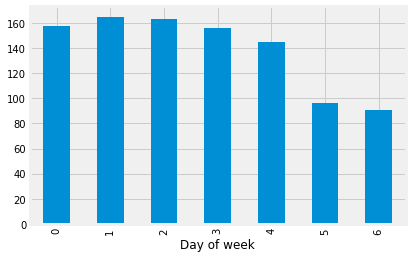

In [19]:
train.groupby('Day of week') ['Count'].mean().plot.bar()

In [20]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%y %H:%M')
train.index = train.Timestamp

#Hourly
hourly = train.resample('H').mean()

#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()

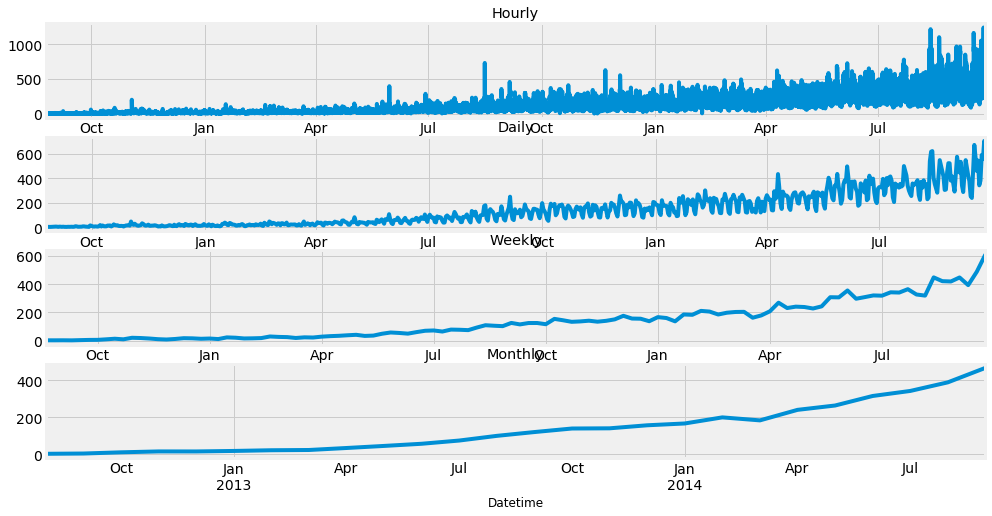

In [21]:
fig,axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])

In [22]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Converting to Daily mean 
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Converting to Daily mean
train = train.resample('D').mean()

In [23]:
# dividing data into training and validatton
Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']

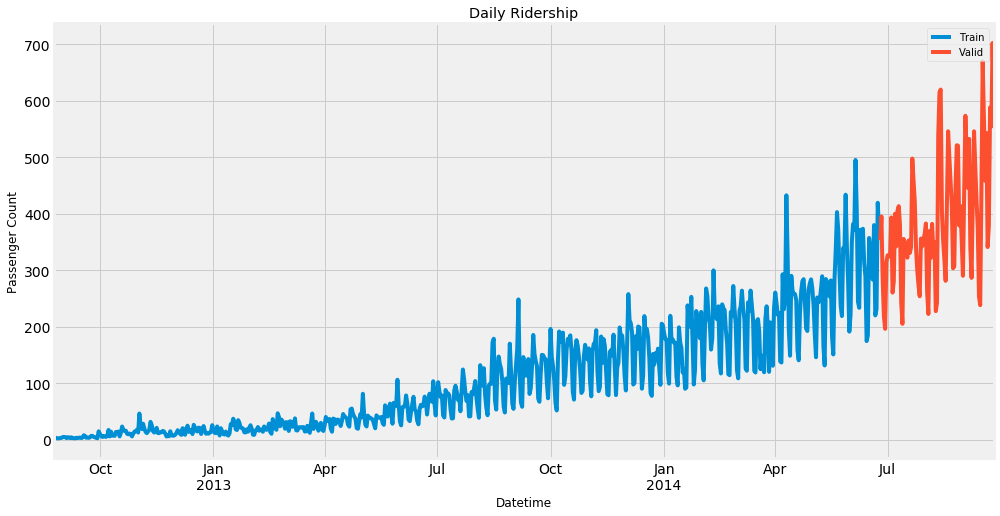

In [24]:
Train.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'Train')
valid.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

In [26]:
#Calculating hourly ration of count
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

#Grouping hourly ratio
temp = train_original.groupby(['Hour']) ['ratio'].sum()

#Group by to csv format
pd.DataFrame(temp, columns= ['Hour', 'ratio']).to_csv('Groupby.csv')
temp2 = pd.read_csv("Groupby.csv")

### ARIMA Model

In [29]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
def test_stationary(timeseries):
    roll_mean = timeseries.rolling(45).mean()
    #print(roll_mean.head(25))
    roll_std = timeseries.rolling(45).std()
    plt.figure(figsize=(15,6))
    plt.plot(timeseries,color='blue',label='original')
    plt.legend('original')
    plt.plot(roll_mean,color='orange',label='mean')
    plt.legend('mean')
    plt.plot(roll_std,color='green',label='std')
    plt.legend(loc='best')
    plt.show()
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput_1 = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])    
    for key,value in dftest[4].items():       
        dfoutput_1['Critical Value (%s)'%key] = value 
    print(dfoutput_1)
    print('Results of kpss test')
    dftest = kpss(timeseries,regression='c')
    dfoutput_2 = pd.Series(dftest[0:3],index=['Test Statistic','p-value','Lags Used'])    
    for key,value in dftest[3].items():       
        dfoutput_2['Critical Value (%s)'%key] = value 
    print(dfoutput_2)
    
    

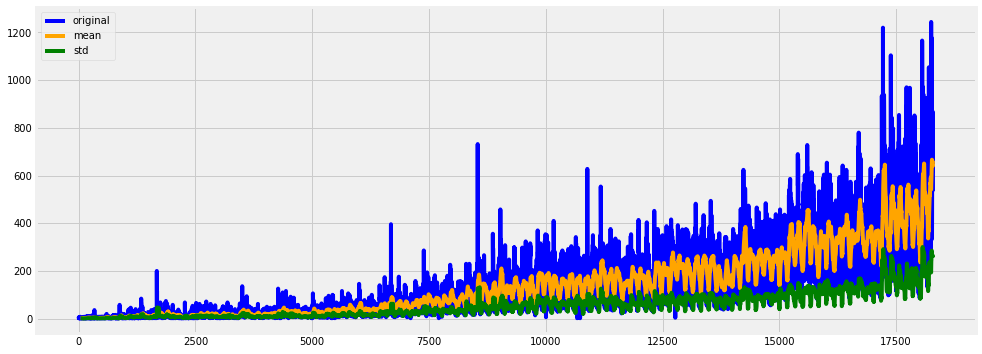

Results of Dickey-Fuller Test
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64
Results of kpss test
Test Statistic           32.377296
p-value                   0.010000
Lags Used                45.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [30]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(train_original['Count'])

In [31]:
# Remove Trend
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

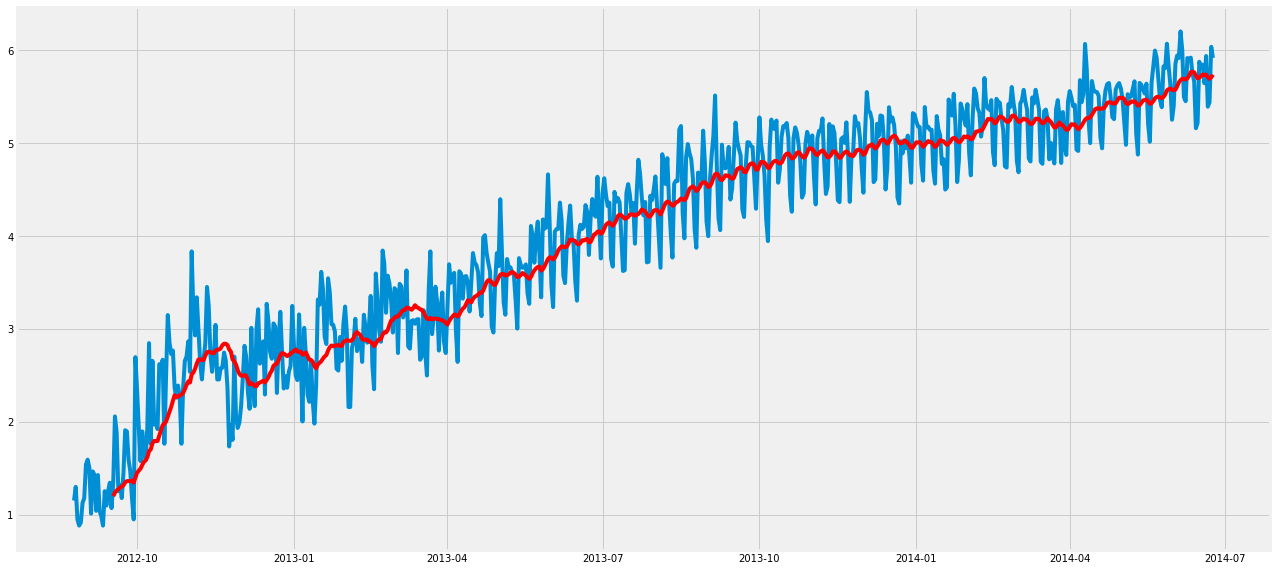

In [32]:
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')

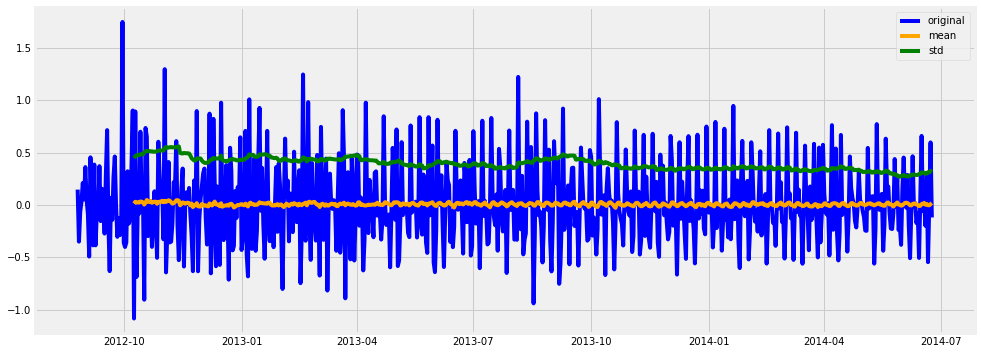

Results of Dickey-Fuller Test
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64
Results of kpss test
Test Statistic            0.087163
p-value                   0.100000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [33]:
#acc to dickey-fuller test seires is stationary
#kpss test : series is not stationary
#-> series is difference stationary
train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

### Let's say seasonal variation

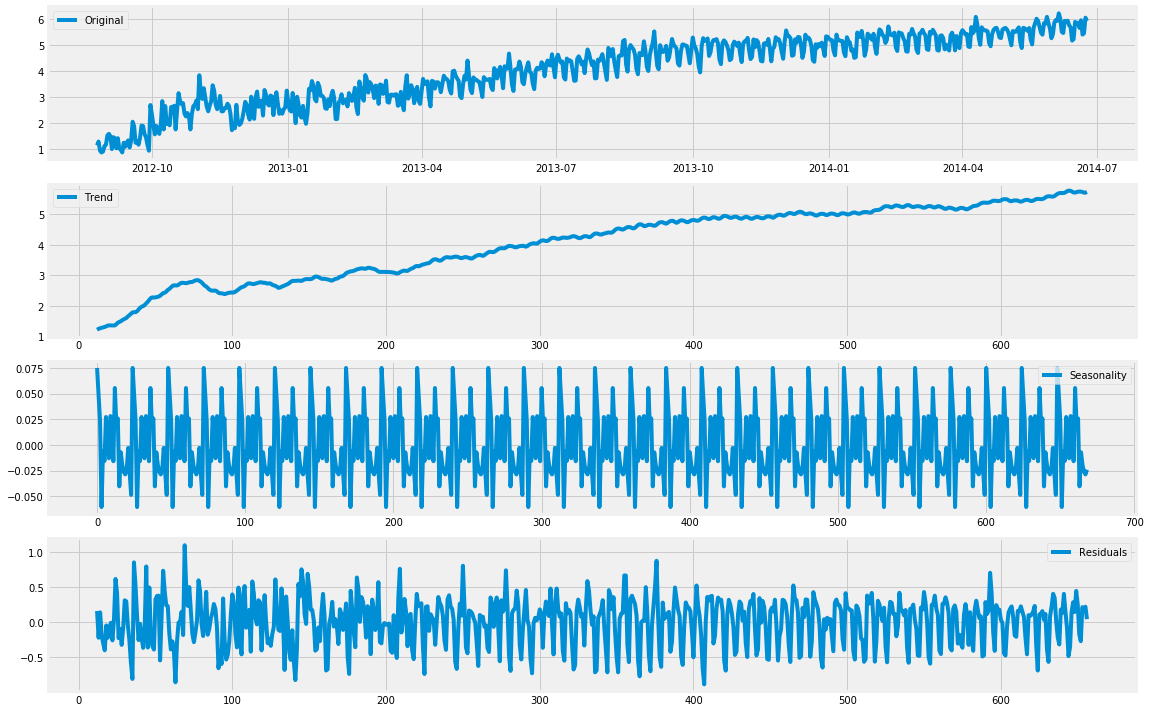

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best') 
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals')
plt.legend(loc='best') 
plt.tight_layout()


<Figure size 1152x576 with 0 Axes>

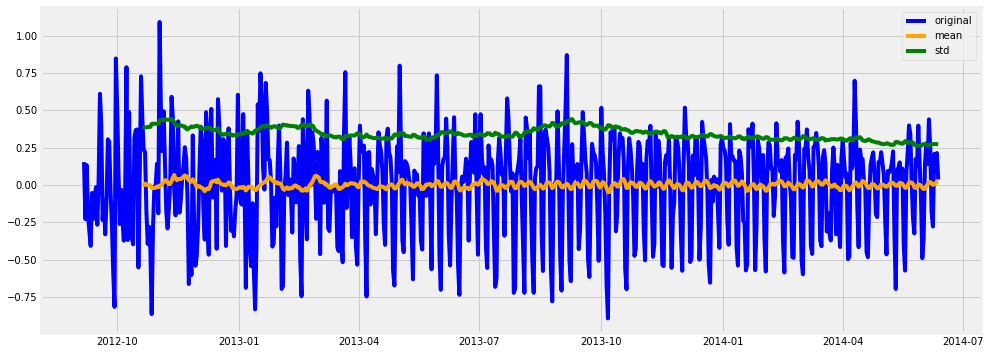

Results of Dickey-Fuller Test
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64
Results of kpss test
Test Statistic            0.035703
p-value                   0.100000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [36]:
# checking stationarity of residulas
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])


Text(0.5, 1.0, 'ACF')

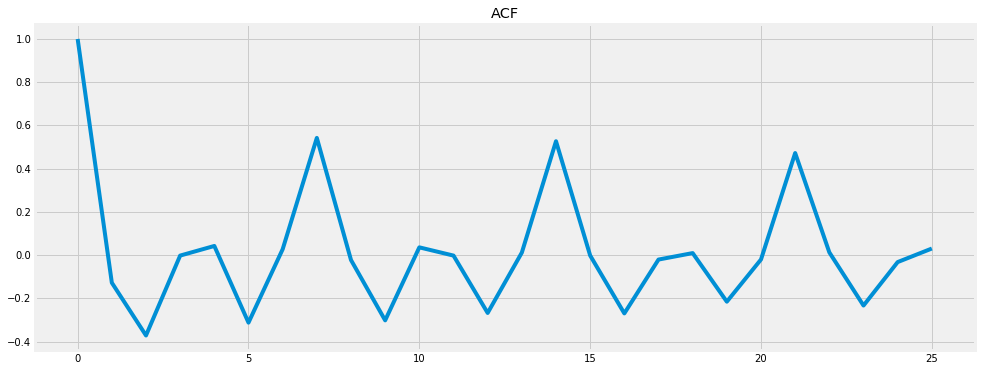

In [37]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(train_log_diff.dropna(),nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")
plt.figure(figsize=(15,6))
plt.plot(lag_acf)
plt.title('ACF')


Text(0.5, 1.0, 'PACF')

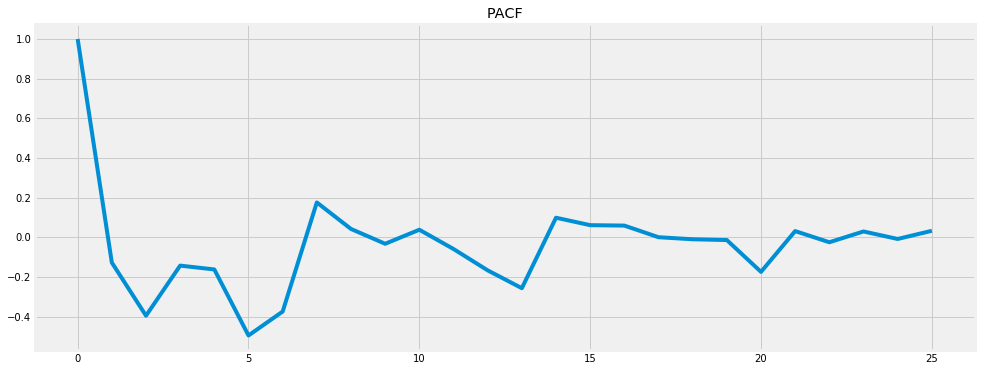

In [38]:
plt.figure(figsize=(15,6))
plt.plot(lag_pacf)
plt.title('PACF')

### AR Model

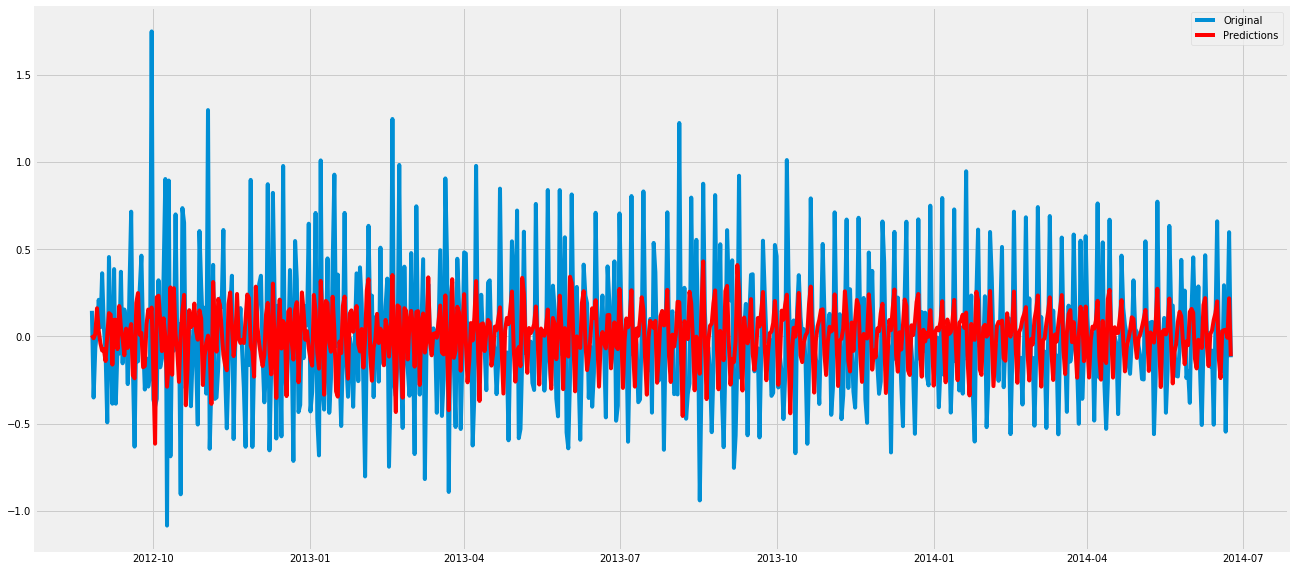

In [42]:
#p=1 #d=? #q=1 or 2
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')

In [44]:
AR_predict = results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0])* np.log(valid['Count'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

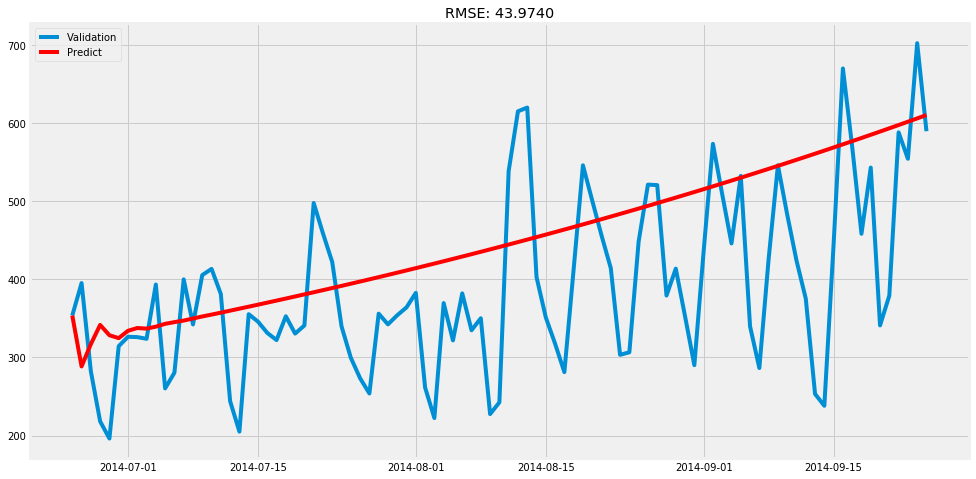

In [47]:
plt.figure(figsize = (15,8))
plt.plot(valid['Count'], label = "Validation")
plt.plot(AR_predict, color = "red", label = "Predict")
plt.legend(loc = "best")
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

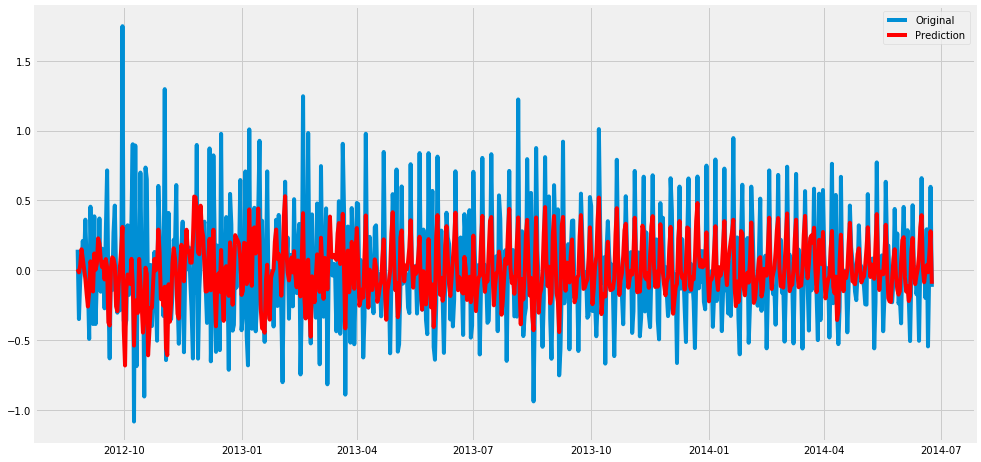

In [48]:
# moving avergae model
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

In [49]:
MA_predict = results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

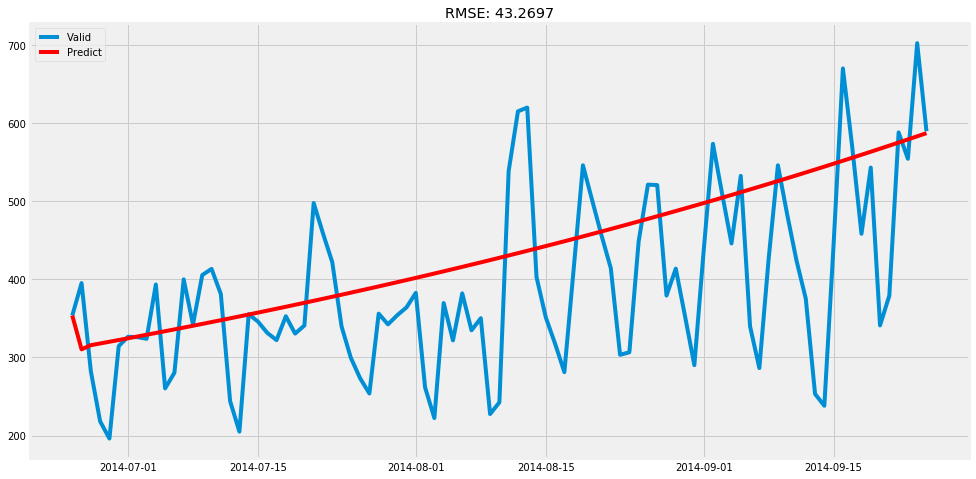

In [50]:
plt.figure(figsize = (15,8))
plt.plot(valid['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

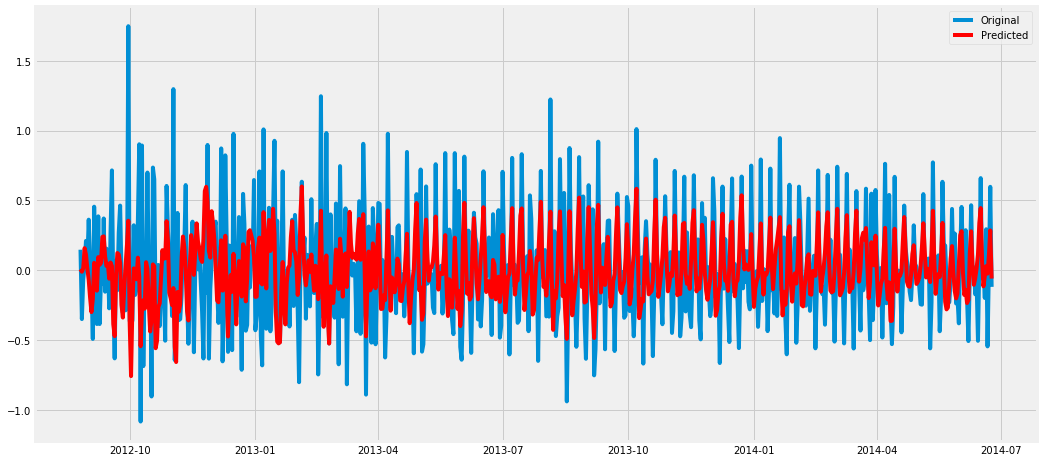

In [51]:
# Combined Model
plt.figure(figsize = (16,8))
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [52]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [53]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

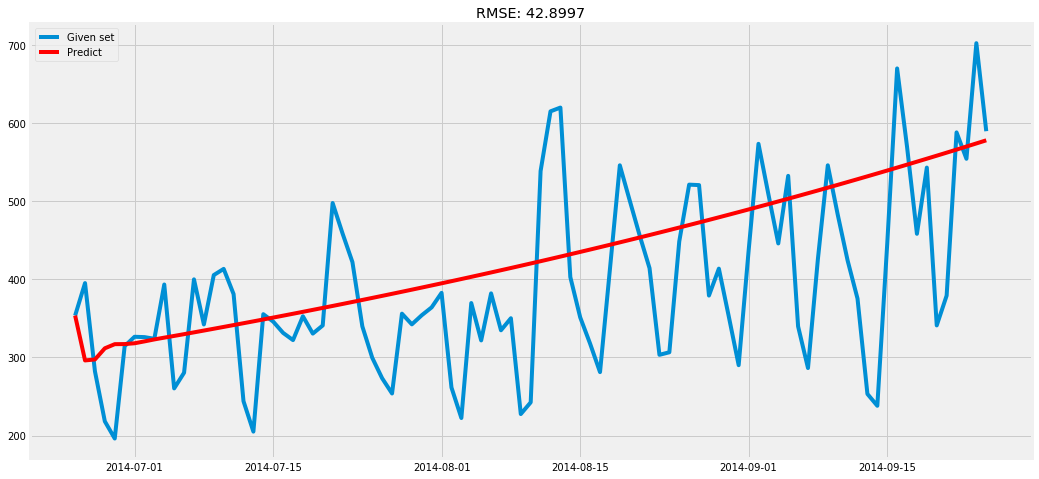

In [55]:
plt.figure(figsize = (16,8))
check_prediction_diff(ARIMA_predict_diff, valid)

### SARIMAX model

In [57]:
import statsmodels.api as sm

In [ ]:
#rmse(0,1,2): 0.385
#rmse(0,1,1): 0.3853121527
#rmse(1,1,1):0.3800234924404775
#rmse(1,0,1):0.383935
#rmse(1,1,2):0.3730855025762353
pred_ts_log = pred_ts_log_diff.cumsum()
pred_ts_log = pred_ts_log+ts_log[0]
pred_ts_log


Text(0.5, 1.0, 'SARIMAX Model')

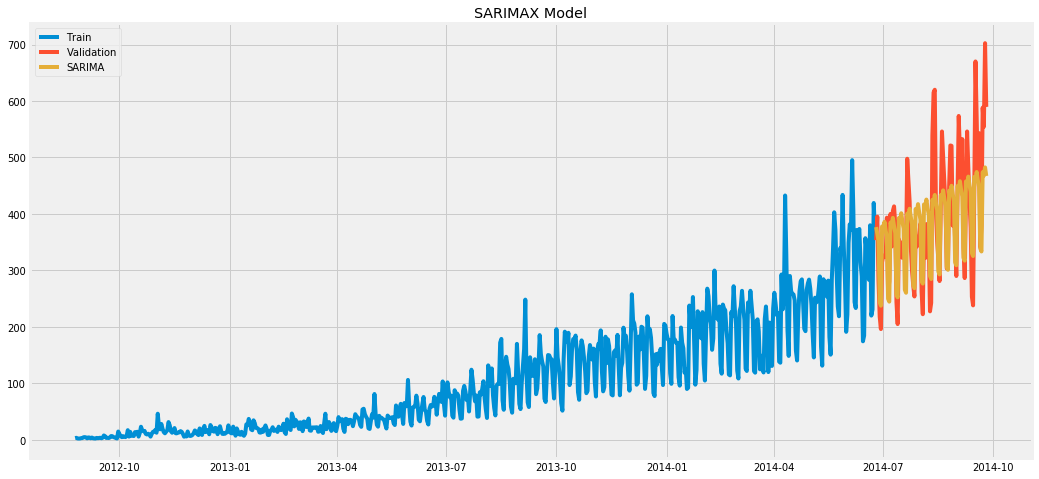

In [58]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order = (2,1,4), seasonal_order =(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label = "Train")
plt.plot(valid.Count, label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA")
plt.legend(loc = "best")
plt.title("SARIMAX Model")

In [59]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

69.67242279085332


In [60]:
# converitng prediciton back to hourly scale

In [61]:
predict = fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)
test['prediction']=predict

In [62]:
test.head()

,ID,year,month,day,Hour,Day of Week,Day of week,prediction
Datetime,,,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,4.0,4.0,455.338660
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,5.0,5.0,346.994039
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,6.0,6.0,341.721856
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,0.0,0.0,481.895572
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,1.0,1.0,476.056308


In [63]:
#Merge test and test_original on day,month and year
merge = pd.merge(test,test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge['Hour_y']

#Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

#Converting the ratio to original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24

In [66]:
prediction.head()

,ID_x,year,month,day,Hour_x,Day of Week_x,Day of week_x,prediction,ID_y,Datetime,Hour_y,Day of Week_y,Day of week_y,Hour,Hour.1,ratio,Count
0,18299.5,2014.0,9.0,26.0,11.5,4.0,4.0,455.33866,18288,2014-09-26 00:00:00,0,4,4,0,NaN,0.044287,483.969494
1,18299.5,2014.0,9.0,26.0,11.5,4.0,4.0,455.33866,18289,2014-09-26 01:00:00,1,4,4,1,NaN,0.035343,386.232976
2,18299.5,2014.0,9.0,26.0,11.5,4.0,4.0,455.33866,18290,2014-09-26 02:00:00,2,4,4,2,NaN,0.029911,326.872060
3,18299.5,2014.0,9.0,26.0,11.5,4.0,4.0,455.33866,18291,2014-09-26 03:00:00,3,4,4,3,NaN,0.024714,270.082706
4,18299.5,2014.0,9.0,26.0,11.5,4.0,4.0,455.33866,18292,2014-09-26 04:00:00,4,4,4,4,NaN,0.020802,227.329429


In [69]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')